## Lab 5.1: Dimensionality Reduction

<function matplotlib.pyplot.show(close=None, block=None)>

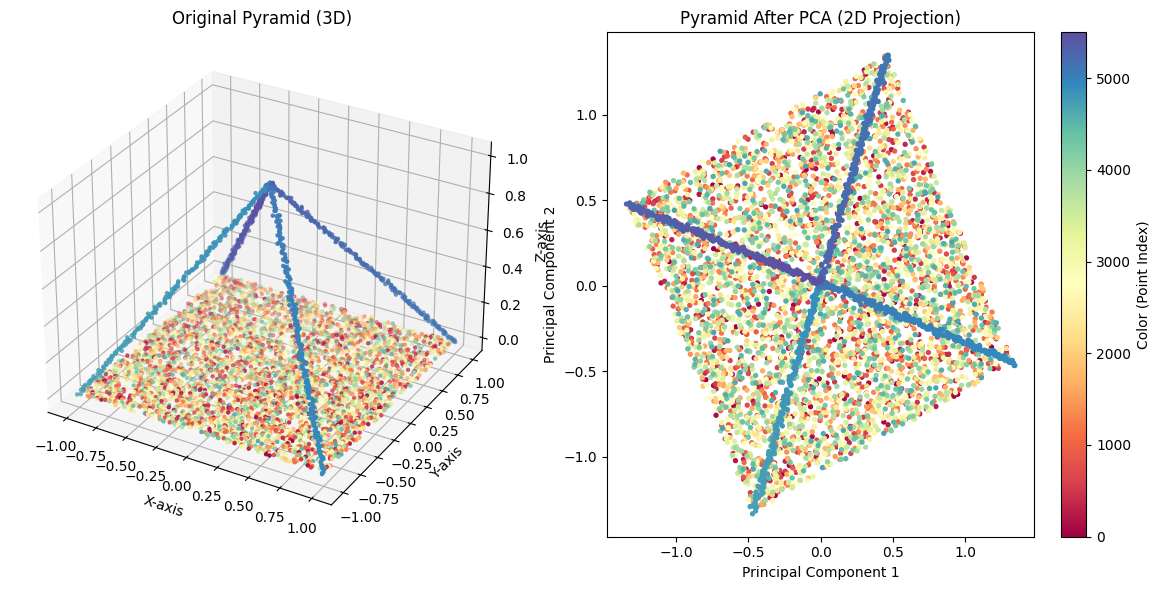

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Generated by Claude AI
def generate_pyramid_dataset():
    np.random.seed(42)
    
    base_var = 4700

    # Base (square in the x-y plane at z=0)
    base_x = np.random.uniform(-1, 1, base_var)
    base_y = np.random.uniform(-1, 1, base_var)
    base_z = np.zeros(base_var)
    base = np.vstack((base_x, base_y, base_z)).T
    
    # Edges (lines connecting base corners to the apex)
    num_edge_points = 200
    
    # Edge 1 (corner at (-1, -1) to apex)
    edge1_x = np.linspace(-1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge1_y = np.linspace(-1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge1_z = np.linspace(0, 1, num_edge_points)
    edge1 = np.vstack((edge1_x, edge1_y, edge1_z)).T
    
    # Edge 2 (corner at (1, -1) to apex)
    edge2_x = np.linspace(1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge2_y = np.linspace(-1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge2_z = np.linspace(0, 1, num_edge_points)
    edge2 = np.vstack((edge2_x, edge2_y, edge2_z)).T
    
    # Edge 3 (corner at (1, 1) to apex)
    edge3_x = np.linspace(1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge3_y = np.linspace(1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge3_z = np.linspace(0, 1, num_edge_points)
    edge3 = np.vstack((edge3_x, edge3_y, edge3_z)).T
    
    # Edge 4 (corner at (-1, 1) to apex)
    edge4_x = np.linspace(-1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge4_y = np.linspace(1, 0, num_edge_points) + np.random.normal(0, 0.01, num_edge_points)
    edge4_z = np.linspace(0, 1, num_edge_points)
    edge4 = np.vstack((edge4_x, edge4_y, edge4_z)).T
    
    # Combine all parts
    pyramid = np.vstack((base, edge1, edge2, edge3, edge4))
    colors = np.arange(pyramid.shape[0])  # Gradient coloring by index

    return pyramid, colors


X, color = generate_pyramid_dataset()

fig = plt.figure(figsize=(12,6))

# 3D visualization
ax1 = fig.add_subplot(121, projection="3d")
sc = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=5)
ax1.set_title("Original Pyramid (3D)")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

# applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 2D visualization
ax2 = fig.add_subplot(122)
sc2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral, s=8)
ax2.set_title("Pyramid After PCA (2D Projection)")  
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.colorbar(sc2, ax=ax2, label="Color (Point Index)")
plt.tight_layout()
plt.show